- Author: Peter Riesebos
- Purpose: Script used to inspect summary stats from multiple studies and compare them, plotting correlations, heatmaps, and UpSet graphs.
- Input: List of protein coding genes, mbQTL format summary stat files
- Output: graphs

## Library and file imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from upsetplot import UpSet, plot
from scipy.stats import pearsonr

In [2]:
# protein coding genes gencode v44
genes = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/protein_coding_genes_list.txt", names=["Gene"])
genes

,Gene
0,ENSG00000186092.7
1,ENSG00000284733.2
2,ENSG00000284662.2
3,ENSG00000187634.13
4,ENSG00000188976.11
...,...
20065,ENSG00000277836.1
20066,ENSG00000278633.1
20067,ENSG00000276017.1
20068,ENSG00000278817.1


In [3]:
# mbqtl pub_rna summary stats
pub_rna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/pub_rna_100perm_30_cutoff_maf_0.05/merged_topEffects_final.txt", sep="\t")
pub_rna

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12713826,2,75041011,T/A,A,...,-;-;0.744204;0.554869;0.764917;0.824807;0.8929...,-;-;6.694893;3.064522;6.798465;14.189217;17.11...,-;-;58;28;55;179;186;116;36,1130,0.00,0.802280,59.474285,3.045097e-119,0.000028,1.121408e-114
1,ENSG00000226752.10,9,120824828,+,ENSG00000226752.10,rs12684934,9,120830881,C/T,T,...,-;-0.656852;-0.840908;-0.525352;-0.743613;-;-0...,-;-4.285708;-8.259505;-2.87077;-6.503607;-;-16...,-;35;58;28;55;-;186;116;36,1016,0.00,1.102720,48.148537,2.816799e-113,0.000218,5.186666e-109
2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.00,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.00,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.00,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,ENSG00000228262.11,2,33706886,+,ENSG00000228262.11,rs1470611,2,33671049,C/A,A,...,-;-;-;-;-0.377367;-;-;-;-0.507666,-;-;-;-;-2.840179;-;-;-;-3.160536,-;-;-;-;55;-;-;-;36,755,0.00,0.750680,38.121667,6.234829e-03,0.000027,4.982812e-02
4608,ENSG00000110881.12,12,50057548,+,ENSG00000110881.12,rs386376466,12,50128488,C/CAAA,CAAA,...,-0.21666;-0.287802;-0.151555;-0.02799;0.086965...,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...,32;35;58;28;55;179;186;116;36,2512,0.00,0.822640,104.917207,6.248249e-03,0.000019,4.990659e-02
4609,ENSG00000117153.16,1,202891116,-,ENSG00000117153.16,rs7539542,1,202940846,G/C,C,...,-;-;0.30794;0.584245;-0.046837;-;0.240089;-;0....,-;-;2.351604;3.26448;-0.339558;-;3.30072;-;0.5...,-;-;58;28;55;-;186;-;36,1976,0.01,0.919379,181.941473,6.248713e-03,0.000021,4.990659e-02
4610,ENSG00000257431.1,12,82512677,+,ENSG00000257431.1,rs11358515,12,82432863,TA/T,T,...,-;-;-;-;-;-;-0.236501;-;-0.238909,-;-;-;-;-;-;-3.249935;-;-1.403279,-;-;-;-;-;-;186;-;36,201,0.00,0.870215,6.988307,6.246344e-03,0.000401,4.990659e-02


In [4]:
# mbqtl 1000IBD summary stats
werna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output/1000ibd_merged_topeffects_final.txt", sep="\t")
werna

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.1000IBD.,DatasetZScores.1000IBD.,DatasetSampleSizes.1000IBD.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000155957.19,12,66135846,-,ENSG00000155957.19,rs17767200,12,66143554,A/G,G,...,-0.828067,-15.573369,212,3617,0.0,0.929257,335.619701,1.657916e-48,2.442690e-06,7.190934e-44
1,ENSG00000254851.1,11,117135528,+,ENSG00000254851.1,rs236910,11,117211258,A/G,G,...,0.831346,15.690419,212,4662,0.0,0.816410,669.767333,4.300551e-43,4.373510e-07,9.326463e-39
2,ENSG00000277149.5,7,72558744,-,ENSG00000277149.5,rs6947199,7,72743715,A/G,G,...,-0.816480,-15.172103,212,3459,0.0,0.831267,233.065154,2.390197e-41,1.461780e-06,3.455694e-37
3,ENSG00000278266.1,12,127147149,+,ENSG00000278266.1,rs11058961,12,127060453,G/A,A,...,0.777615,13.945170,212,5606,0.0,0.979991,804.333083,1.769858e-40,1.502960e-06,1.919116e-36
4,ENSG00000171903.17,19,15912367,-,ENSG00000171903.17,rs12985091,19,15934939,G/A,A,...,-0.772235,-13.787412,212,6539,0.0,0.986046,584.458459,6.398493e-40,2.161000e-06,5.550480e-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,ENSG00000288784.1,7,144183466,+,ENSG00000288784.1,rs1277668795,7,143886866,ATT/A,A,...,0.335221,4.997380,212,3391,0.0,0.754600,244.023012,1.355350e-03,6.029380e-07,4.850336e-02
1212,ENSG00000163389.12,3,119468963,+,ENSG00000163389.12,rs1797839,3,119531024,T/C,C,...,-0.341862,-5.102727,212,4463,0.0,0.737063,342.555047,1.359827e-03,3.461010e-07,4.862344e-02
1213,ENSG00000184730.12,16,28494643,+,ENSG00000184730.12,rs181209,16,28503533,G/T,T,...,0.320967,4.772596,212,3307,0.0,0.850293,222.571658,1.377804e-03,1.843100e-06,4.922565e-02
1214,ENSG00000236981.1,11,124023013,+,ENSG00000236981.1,rs76000277,11,123126109,G/A,A,...,-0.322202,-4.792008,212,5987,0.0,0.976225,704.818060,1.379322e-03,1.668630e-06,4.923935e-02


In [5]:
# mbqtl 1000IBD summary stats
gtex = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/mbQTL_output/GTEx_colon_small_final.txt", sep="\t")
gtex

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetZScores.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetSampleSizes.GTEx_Colon_Transverse.GTEx_Small_Intestine.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12366,2,74958729,G/T,T,...,0.880422;0.844401,23.196152;7.1151,363;43,3027,0.00,0.714788,362.741606,3.479480e-91,0.000018,1.069360e-87
1,ENSG00000270127.2,15,100547765,-,ENSG00000270127.2,rs36053285,15,100574435,T/C,C,...,-0.811839;-0.778316,-19.697398;-6.143089,363;43,4575,0.00,0.925538,883.963708,8.771240e-85,0.000025,1.347847e-81
2,ENSG00000236209.1,2,74919555,-,ENSG00000236209.1,rs12366,2,74958729,G/T,T,...,0.82331;0.826306,20.208727;6.823381,363;43,3026,0.00,0.845181,444.961475,3.652563e-83,0.000034,3.741848e-80
3,ENSG00000254614.2,11,65177606,-,ENSG00000254614.2,rs12800339,11,65179769,T/C,C,...,-0.804084;-0.863772,-19.364157;-7.456511,363;43,2042,0.00,0.825770,234.325716,5.112343e-77,0.000058,3.927983e-74
4,ENSG00000273295.1,22,23901432,-,ENSG00000273295.1,rs5751777,22,23924860,C/T,T,...,0.784523;0.830106,18.563044;6.882745,363;43,3771,0.00,0.908344,639.484255,1.066123e-76,0.000032,6.553105e-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,ENSG00000273172.1,17,183824,-,ENSG00000273172.1,17:201297:C:T,17,201297,C/T,T,...,0.197503;0.307728,3.787334;2.007452,363;43,2227,0.02,0.776804,431.301301,2.978838e-02,0.000023,4.940616e-02
1853,ENSG00000263232.2,16,72005037,-,ENSG00000263232.2,rs4556810,16,72999574,C/A,A,...,-0.196508;-0.311467,-3.767863;-2.033125,363;43,2158,0.04,0.650088,161.050193,2.990006e-02,0.000024,4.956464e-02
1854,ENSG00000167768.4,12,52674736,-,ENSG00000167768.4,rs1567759,12,52697782,C/A,A,...,0.18572;0.379869,3.557229;2.512535,363;43,3624,0.02,0.809875,421.178193,3.003728e-02,0.000029,4.976526e-02
1855,ENSG00000279187.1,17,81262920,+,ENSG00000279187.1,rs7224668,17,81261988,T/C,C,...,0.230089;-0.034816,4.428212;-0.22164,363;43,3984,0.04,0.938883,611.403624,3.014916e-02,0.000039,4.992372e-02


In [30]:
# mbqtl 1000IBD summary stats
all_studies = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/combined/combined_datasets_merged_final.txt", sep="\t")
all_studies

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.1000IBD.ERP113396.ERP114636.GTEx_Colon_Transverse.GTEx_Small_Intestine.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792,2,74918148,+,ENSG00000204792,rs12366,2,74958729,G/T,T,...,0.775618;-;-;0.880422;0.844401;0.742203;0.5267...,13.886314;-;-;23.196152;7.1151;6.667258;2.8799...,212;-;-;363;43;58;28;55;179;186;116;36,4124,0.00,0.829112,510.072277,1.167783e-259,0.000012,3.958785e-255
1,ENSG00000254851,11,117135528,+,ENSG00000254851,rs35186251,11,117205992,T/C,C,...,0.830863;0.680283;0.700251;0.714185;0.775487;0...,15.673072;4.283534;4.682681;16.038324;6.106354...,212;32;35;363;43;58;28;55;179;186;116;36,5115,0.00,0.940423,1122.160269,6.835783e-217,0.000010,1.158665e-212
2,ENSG00000164308,5,96875986,+,ENSG00000164308,rs35304156,5,96983311,CAT/C,C,...,0.798882;-;0.51394;0.845427;0.868714;0.749766;...,14.595929;-;3.158018;21.266603;7.549363;6.7724...,212;-;35;363;43;58;-;55;179;186;116;36,4450,0.00,0.774101,319.123002,2.584090e-214,0.000013,2.920022e-210
3,ENSG00000165171,7,73834590,-,ENSG00000165171,rs8629,7,73831189,T/C,C,...,-0.742649;-0.466703;-0.596777;-0.814443;-0.789...,-12.962524;-2.692676;-3.784019;-19.811481;-6.2...,212;32;35;363;43;58;28;55;179;186;116;36,2502,0.00,0.881083,459.435556,2.312385e-213,0.000018,1.959746e-209
4,ENSG00000214401,17,46193566,+,ENSG00000214401,rs169201,17,46712837,A/G,G,...,0.709041;0.703406;0.520276;0.716104;0.754089;-...,12.098996;4.490397;3.203756;16.101356;5.83829;...,212;32;35;363;43;-;-;55;179;186;116;36,6687,0.00,0.977479,329.307091,1.353968e-195,0.000042,9.179905e-192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,ENSG00000236493,10,92668745,-,ENSG00000236493,rs1338806625,10,92637032,CA/C,C,...,0.06438;-;-;0.225066;0.387544;-;-;-;-;-;-;-,0.932818;-;-;4.328959;2.567626;-;-;-;-;-;-;-,212;-;-;363;43;-;-;-;-;-;-;-,4683,0.02,0.686248,352.274975,1.532827e-02,0.000006,4.986838e-02
10420,ENSG00000133275,19,1941172,+,ENSG00000133275,19:1963042:G:GCCAGGCTCA,19,1963042,G/GCCAGGCTCAATGAGACACT,GCCAGGCTCAATGAGACACT,...,-0.1058;-0.067433;-0.272574;-0.292515;-0.05967...,-1.535682;-0.366702;-1.584167;-5.678628;-0.380...,212;32;35;363;43;58;28;55;179;186;116;36,5820,0.01,0.751604,1283.907044,1.533359e-02,0.000003,4.988089e-02
10421,ENSG00000273957,5,100388853,+,ENSG00000273957,rs276465,5,100770898,A/T,T,...,-0.205742;-;-;-;-;-0.054607;-;-0.012572;-;-0.1...,-3.010202;-;-;-;-;-0.407123;-;-0.091098;-;-2.6...,212;-;-;-;-;58;-;55;-;186;-;-,1365,0.01,0.793753,20.551058,1.534182e-02,0.000232,4.990288e-02
10422,ENSG00000267472,17,68198921,+,ENSG00000267472,rs8067476,17,68216846,T/C,C,...,0.101095;-;-;0.142688;0.148103;-;-;0.130077;-;...,1.467023;-;-;2.723144;0.947801;-;-;0.946552;-;...,212;-;-;363;43;-;-;55;-;186;-;36,4770,0.00,0.706202,566.681982,1.535437e-02,0.000004,4.993891e-02


Before filtering we find:
- 1857 eGenes in GTEx (406 samples)
- 1216 eGenes in 1000IBD (227 samples)
- 4612 eGenes in pub rna (724 samples)

### mbqtl summary stats pre-qvalue filter

In [6]:
all_topeffects_pub_rna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/pub_rna_100perm_30_cutoff_maf_0.05/merged_topEffects_qvalue.txt", sep="\t")
all_topeffects_werna = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/qtl/eqtl/output/1000ibd_merged_topeffects_qvalues.txt", sep="\t")
all_topeffects_gtex = pd.read_csv("/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/mbQTL_output/GTEx_colon_small_qvalues.txt", sep="\t")
print("found eGenes in each dataset (pub rna, 1000IBD, GTEx): \n",all_topeffects_pub_rna.shape[0], all_topeffects_werna.shape[0],all_topeffects_gtex.shape[0])

found eGenes in each dataset (pub rna, 1000IBD, GTEx): 
 50563 50034 5860


## Data inspection

### Remaining eGenes after filtering on protein coding genes

In [7]:
intersect_pub_rna = set(pub_rna["Gene"]) & set(genes["Gene"])
print(len(intersect_pub_rna))

2820


In [8]:
intersect_werna = set(werna["Gene"]) & set(genes["Gene"])
print(len(intersect_werna))

737


In [9]:
intersect_gtex = set(gtex["Gene"]) & set(genes["Gene"])
print(len(intersect_gtex))

150


After filtering on protein coding genes we find:
- 150 eGenes in GTEx (406 samples)
- 737 eGenes in 1000IBD (227 samples)
- 2820 eGenes in pub rna (724 samples)

### Test overlap without gene version numbering

In [10]:
new_genes = genes.copy()
new_genes['Gene'] = new_genes['Gene'].str.replace(r'\.\d+$', '', regex=True)
new_genes.Gene.head(1)

0    ENSG00000186092
Name: Gene, dtype: object

In [11]:
gtex_copy = gtex.copy()
gtex_copy['Gene'] = gtex_copy['Gene'].str.replace(r'\.\d+$', '', regex=True)
gtex_copy.Gene.head(1)

0    ENSG00000204792
Name: Gene, dtype: object

In [12]:
intersect_gtex = set(new_genes["Gene"]) & set(gtex_copy["Gene"])
print(len(intersect_gtex))

150


In [13]:
gtex[~gtex["Gene"].isin(genes["Gene"])]

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetZScores.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetSampleSizes.GTEx_Colon_Transverse.GTEx_Small_Intestine.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12366,2,74958729,G/T,T,...,0.880422;0.844401,23.196152;7.1151,363;43,3027,0.00,0.714788,362.741606,3.479480e-91,0.000018,1.069360e-87
1,ENSG00000270127.2,15,100547765,-,ENSG00000270127.2,rs36053285,15,100574435,T/C,C,...,-0.811839;-0.778316,-19.697398;-6.143089,363;43,4575,0.00,0.925538,883.963708,8.771240e-85,0.000025,1.347847e-81
2,ENSG00000236209.1,2,74919555,-,ENSG00000236209.1,rs12366,2,74958729,G/T,T,...,0.82331;0.826306,20.208727;6.823381,363;43,3026,0.00,0.845181,444.961475,3.652563e-83,0.000034,3.741848e-80
3,ENSG00000254614.2,11,65177606,-,ENSG00000254614.2,rs12800339,11,65179769,T/C,C,...,-0.804084;-0.863772,-19.364157;-7.456511,363;43,2042,0.00,0.825770,234.325716,5.112343e-77,0.000058,3.927983e-74
4,ENSG00000273295.1,22,23901432,-,ENSG00000273295.1,rs5751777,22,23924860,C/T,T,...,0.784523;0.830106,18.563044;6.882745,363;43,3771,0.00,0.908344,639.484255,1.066123e-76,0.000032,6.553105e-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,ENSG00000273987.1,12,75333798,-,ENSG00000273987.1,rs753745525,12,75435052,G/GT,GT,...,-0.22013;-0.073349,-4.231602;-0.467436,363;43,3489,0.00,0.840161,437.411937,2.976510e-02,0.000033,4.939420e-02
1852,ENSG00000273172.1,17,183824,-,ENSG00000273172.1,17:201297:C:T,17,201297,C/T,T,...,0.197503;0.307728,3.787334;2.007452,363;43,2227,0.02,0.776804,431.301301,2.978838e-02,0.000023,4.940616e-02
1853,ENSG00000263232.2,16,72005037,-,ENSG00000263232.2,rs4556810,16,72999574,C/A,A,...,-0.196508;-0.311467,-3.767863;-2.033125,363;43,2158,0.04,0.650088,161.050193,2.990006e-02,0.000024,4.956464e-02
1855,ENSG00000279187.1,17,81262920,+,ENSG00000279187.1,rs7224668,17,81261988,T/C,C,...,0.230089;-0.034816,4.428212;-0.22164,363;43,3984,0.04,0.938883,611.403624,3.014916e-02,0.000039,4.992372e-02


In [14]:
gtex[gtex["Gene"].isin(genes["Gene"])]

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetZScores.GTEx_Colon_Transverse.GTEx_Small_Intestine.,DatasetSampleSizes.GTEx_Colon_Transverse.GTEx_Small_Intestine.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
10,ENSG00000130348.11,6,106629578,+,ENSG00000130348.11,rs2054365,6,106629627,G/A,A,...,-0.744947;-0.495638,-17.084327;-3.379566,363;43,3456,0.00,0.936115,715.726659,8.249323e-60,0.000033,2.304811e-57
41,ENSG00000204172.12,10,47501854,-,ENSG00000204172.12,rs2996767,10,47577195,A/C,C,...,0.695898;0.67104,15.451028;4.924512,363;43,1607,0.00,0.788072,219.148229,7.319140e-45,0.000049,5.355752e-43
69,ENSG00000255374.3,12,11091287,-,ENSG00000255374.3,rs1839859,12,11143135,G/A,A,...,-0.654016;-0.506319,-14.185506;-3.464181,363;43,4970,0.00,0.767811,484.079179,7.501672e-35,0.000020,3.293591e-33
89,ENSG00000144792.9,3,44578223,+,ENSG00000144792.9,rs939649,3,44590720,G/T,T,...,-0.663621;-0.752294,-14.466926;-5.816541,363;43,3011,0.00,0.592919,213.279846,2.767384e-31,0.000011,9.450104e-30
95,ENSG00000184923.12,10,87225448,+,ENSG00000184923.12,rs61858526,10,87367434,T/C,C,...,0.531087;0.573954,10.929778;4.023971,363;43,2666,0.00,1.063379,456.799071,1.843171e-30,0.000085,5.900707e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,ENSG00000107816.17,10,100996618,+,ENSG00000107816.17,rs55646950,10,101001239,C/T,T,...,-0.225788;0,-4.34322;-0,363;43,3029,0.02,0.825314,293.387404,2.710422e-02,0.000046,4.561900e-02
1826,ENSG00000158104.11,12,121839527,-,ENSG00000158104.11,rs142679491,12,121557231,ATT/A,A,...,0.200356;0.312177,3.843166;2.038003,363;43,3269,0.03,0.676436,242.974688,2.723866e-02,0.000020,4.582018e-02
1833,ENSG00000077254.14,1,77695987,-,ENSG00000077254.14,rs3509,1,77559866,C/T,T,...,-0.220115;-0.05503,-4.231306;-0.35049,363;43,2167,0.02,0.720989,161.856775,2.817624e-02,0.000043,4.721645e-02
1839,ENSG00000158258.16,3,139935185,+,ENSG00000158258.16,rs2042705,3,139941427,G/A,A,...,-0.196621;-0.317989,-3.770079;-2.078029,363;43,2984,0.02,0.717769,280.049914,2.854562e-02,0.000024,4.767947e-02


### Overlapping genes between datasets

In [15]:
intersect = set(pub_rna["Gene"]) & set(werna["Gene"])
print("Genes in both werna and pub_rna:", len(intersect))

Genes in both werna and pub_rna: 889


In [16]:
print("pub_rna isin werna:\n", pub_rna.Gene.isin(werna.Gene).value_counts())
print("werna isin pub_rna:\n", werna.Gene.isin(pub_rna.Gene).value_counts())

pub_rna isin werna:
 Gene
False    3723
True      889
Name: count, dtype: int64
werna isin pub_rna:
 Gene
True     889
False    327
Name: count, dtype: int64


In [17]:
print("pub_rna isin gtex:\n", pub_rna.Gene.isin(gtex.Gene).value_counts())
print("gtex isin pub_rna:\n", gtex.Gene.isin(pub_rna.Gene).value_counts())

pub_rna isin gtex:
 Gene
False    4006
True      606
Name: count, dtype: int64
gtex isin pub_rna:
 Gene
False    1251
True      606
Name: count, dtype: int64


In [18]:
print("werna isin gtex:\n", werna.Gene.isin(gtex.Gene).value_counts())
print("gtex isin werna:\n", gtex.Gene.isin(werna.Gene).value_counts())

werna isin gtex:
 Gene
False    1050
True      166
Name: count, dtype: int64
gtex isin werna:
 Gene
False    1691
True      166
Name: count, dtype: int64


Overlap stays the same at 150 eQTLs

## Dataset cleanup and preparations

In [19]:
filtered_mbqtl = pub_rna[pub_rna["Gene"].isin(genes["Gene"])]
filtered_mbqtl

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.00,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.00,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.00,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
5,ENSG00000164308.17,5,96875986,+,ENSG00000164308.17,rs35304156,5,96983311,CAT/C,C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1673,0.00,0.781309,76.946810,7.958886e-96,0.000018,4.884987e-92
6,ENSG00000165171.11,7,73834590,-,ENSG00000165171.11,rs11284359,7,73832811,TA/T,T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.00,0.833217,86.466338,1.020071e-95,0.000024,5.366544e-92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,ENSG00000138092.11,2,24793136,+,ENSG00000138092.11,rs1369703,2,25259029,T/C,C,...,-;-;-;-;-0.159179;-;-0.299426;-;-0.054683,-;-;-;-;-1.160808;-;-4.151757;-;-0.316754,-;-;-;-;55;-;186;-;36,2223,0.01,0.929818,74.615093,6.185948e-03,0.000056,4.948042e-02
4604,ENSG00000154917.11,3,133824235,-,ENSG00000154917.11,rs10512913,3,133820730,A/C,C,...,-;-;-0.10085;-;-0.424805;-;-0.192914;-;-0.19788,-;-;-0.753253;-;-3.232675;-;-2.638084;-;-1.156861,-;-;58;-;55;-;186;-;36,629,0.00,0.881692,41.245418,6.200686e-03,0.000073,4.958753e-02
4606,ENSG00000114654.8,3,129001304,+,ENSG00000114654.8,rs2341295,3,129032259,G/C,C,...,-;-;-;-;0.367975;-;0.252353;-;0.033029,-;-;-;-;2.763998;-;3.474853;-;0.191234,-;-;-;-;55;-;186;-;36,1934,0.01,0.903451,103.664100,6.224220e-03,0.000034,4.975413e-02
4608,ENSG00000110881.12,12,50057548,+,ENSG00000110881.12,rs386376466,12,50128488,C/CAAA,CAAA,...,-0.21666;-0.287802;-0.151555;-0.02799;0.086965...,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...,32;35;58;28;55;179;186;116;36,2512,0.00,0.822640,104.917207,6.248249e-03,0.000019,4.990659e-02


In [20]:
# ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239
filtered_mbqtl.columns = ['Gene', 'GeneChr', 'GenePos', 'GeneStrand', 'GeneSymbol', 'SNP',
       'SNPChr', 'SNPPos', 'SNPAlleles', 'SNPEffectAllele',
       'SNPEffectAlleleFreq', 'QTLType', 'MetaP', 'MetaPN', 'MetaPZ',
       'MetaBeta', 'MetaSE', 'MetaI2', 'NrDatasets',
       'DatasetCorrelationCoefficients',
       'DatasetZScores',
       'DatasetSampleSizes',
       'NrTestedSNPs', 'ProportionBetterPermPvals', 'BetaDistAlpha',
       'BetaDistBeta', 'BetaAdjustedMetaP', 'PvalueNominalThreshold', 'qval']
filtered_mbqtl = filtered_mbqtl.reset_index()
filtered_mbqtl.head(5)

,index,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,...,DatasetCorrelationCoefficients,DatasetZScores,DatasetSampleSizes,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.0,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
1,3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.0,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
2,4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.0,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
3,5,ENSG00000164308.17,5,96875986,+,ENSG00000164308.17,rs35304156,5,96983311,CAT/C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1673,0.0,0.781309,76.946810,7.958886e-96,0.000018,4.884987e-92
4,6,ENSG00000165171.11,7,73834590,-,ENSG00000165171.11,rs11284359,7,73832811,TA/T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.0,0.833217,86.466338,1.020071e-95,0.000024,5.366544e-92


In [21]:
filtered_mbqtl[['MetaPZ','DatasetZScores']]

,MetaPZ,DatasetZScores
0,24.583483,-;-;7.993022;-;5.413564;12.927695;13.838477;11...
1,23.347720,-;5.647567;7.214328;-;6.181571;12.114261;12.19...
2,22.655268,-;3.475933;5.811565;3.706117;6.536538;11.92781...
3,23.719645,-;3.158018;6.772461;-;7.699995;11.497036;16.42...
4,-22.964243,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...
...,...,...
2815,-4.033554,-;-;-;-;-1.160808;-;-4.151757;-;-0.316754
2816,-3.968234,-;-;-0.753253;-;-3.232675;-;-2.638084;-;-1.156861
2817,4.147997,-;-;-;-;2.763998;-;3.474853;-;0.191234
2818,-4.282618,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...


## Plotting

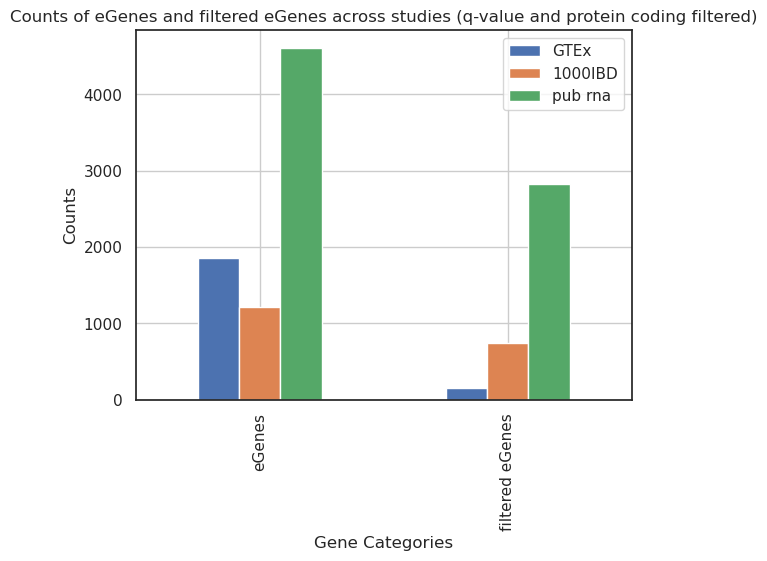

In [29]:
data = {'GTEx': [1857, 150],
        '1000IBD': [1216, 737],
        'pub rna': [4612, 2820]}

index = ['eGenes', 'filtered eGenes']

egenes_per_dataset= pd.DataFrame(data, index=index)

egenes_per_dataset.plot(kind='bar')
plt.xlabel('Gene Categories')
plt.ylabel('Counts')
plt.grid()
plt.title('Counts of eGenes and filtered eGenes across studies (q-value and protein coding filtered)')

plt.show()

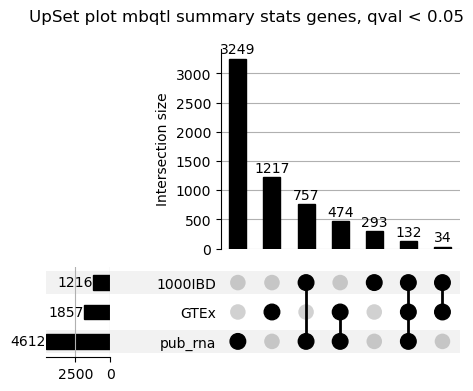

In [23]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub_rna["Gene"])
set2 = set(werna["Gene"])
set3 = set(gtex["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05")
plt.show()

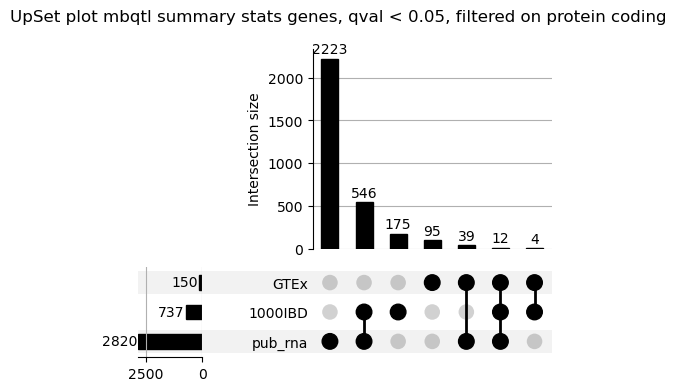

In [24]:
# upset plot of all datasets (gtex, werna, pub) filtered on protein coding genes

set1 = set(pub_rna["Gene"]) & set(genes["Gene"])
set2 = set(werna["Gene"]) & set(genes["Gene"])
set3 = set(gtex["Gene"]) & set(genes["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, qval < 0.05, filtered on protein coding")
plt.show()

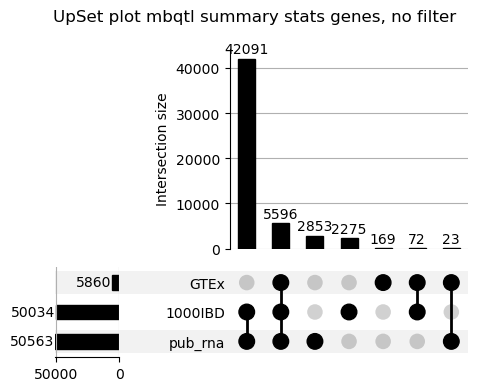

In [25]:
# upset plot of all datasets (gtex, werna, pub) before the qvalue filter
set1 = set(all_topeffects_pub_rna["Gene"])
set2 = set(all_topeffects_werna["Gene"])
set3 = set(all_topeffects_gtex["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, no filter")
plt.show()

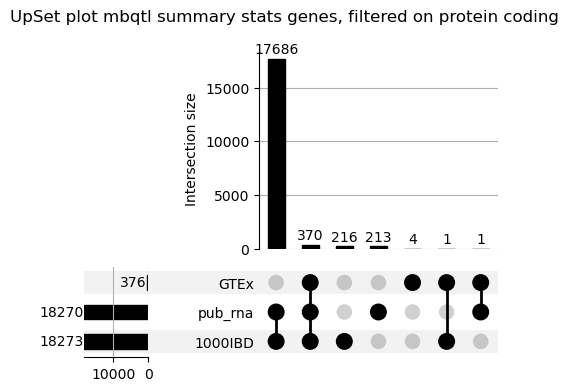

In [26]:
# upset plot of all datasets (gtex, werna, pub) before the qvalue filter
set1 = set(all_topeffects_pub_rna["Gene"]) & set(genes["Gene"])
set2 = set(all_topeffects_werna["Gene"]) & set(genes["Gene"])
set3 = set(all_topeffects_gtex["Gene"]) & set(genes["Gene"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot mbqtl summary stats genes, filtered on protein coding")
plt.show()

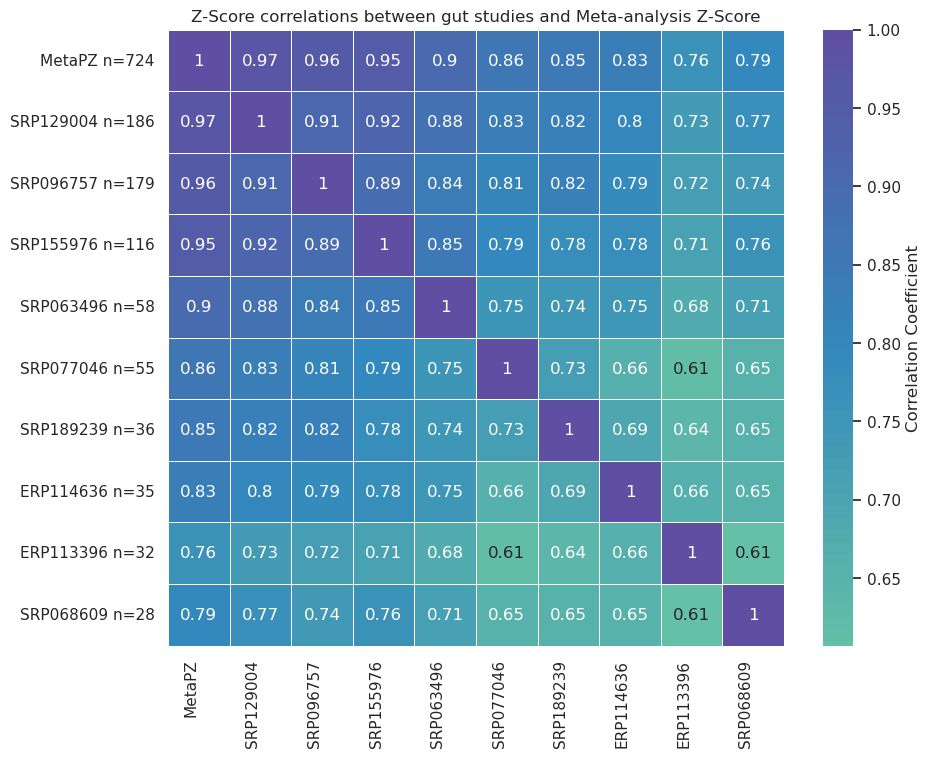

In [27]:
# Define a function to extract dataset size and handle "MetaPZ"
def get_dataset_size(label):
    if label == 'MetaPZ':
        return float('inf')  # Assign a very large value to prioritize it last
    else:
        return int(label.split('n=')[-1])

# Define different labels for x and y axes
x_labels = ['MetaPZ', 'ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']
y_labels = ['MetaPZ n=724', 'ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Extract dataset sizes from y_labels
dataset_sizes = [get_dataset_size(label) for label in y_labels]

# Sort x and y labels and sizes together based on dataset size (descending order)
sorted_indices = np.argsort(dataset_sizes)[::-1]  # Descending order
sorted_x_labels = [x_labels[i] for i in sorted_indices]
sorted_y_labels = [y_labels[i] for i in sorted_indices]

# Split the 'DatasetZScores' column into separate columns
dataset_columns = filtered_mbqtl['DatasetZScores'].str.split(';', expand=True)

# Convert dataset columns to numeric values, replace '-' with NaN
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Concatenate MetaPZ and dataset columns
df = pd.concat([filtered_mbqtl[['MetaPZ']], dataset_columns], axis=1)

# Sort the dataframe columns based on sorted indices
df_sorted = df.iloc[:, sorted_indices]

# Calculate the pairwise correlation matrix
pairwise_corr = df_sorted.corr()

# Plotting the pairwise correlation matrix
sns.set(style="white")
mask = np.triu(np.ones_like(pairwise_corr, dtype=bool))  # Mask to avoid duplicate plots
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pairwise_corr, annot=True, cmap='Spectral', center=0, square=True, linewidths=0.5, 
                      cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Z-Score correlations between gut studies and Meta-analysis Z-Score")

# Set x-axis and y-axis labels
heatmap.set_xticklabels(sorted_x_labels, rotation=90, ha='right')
heatmap.set_yticklabels(sorted_y_labels, rotation=0)

plt.show()

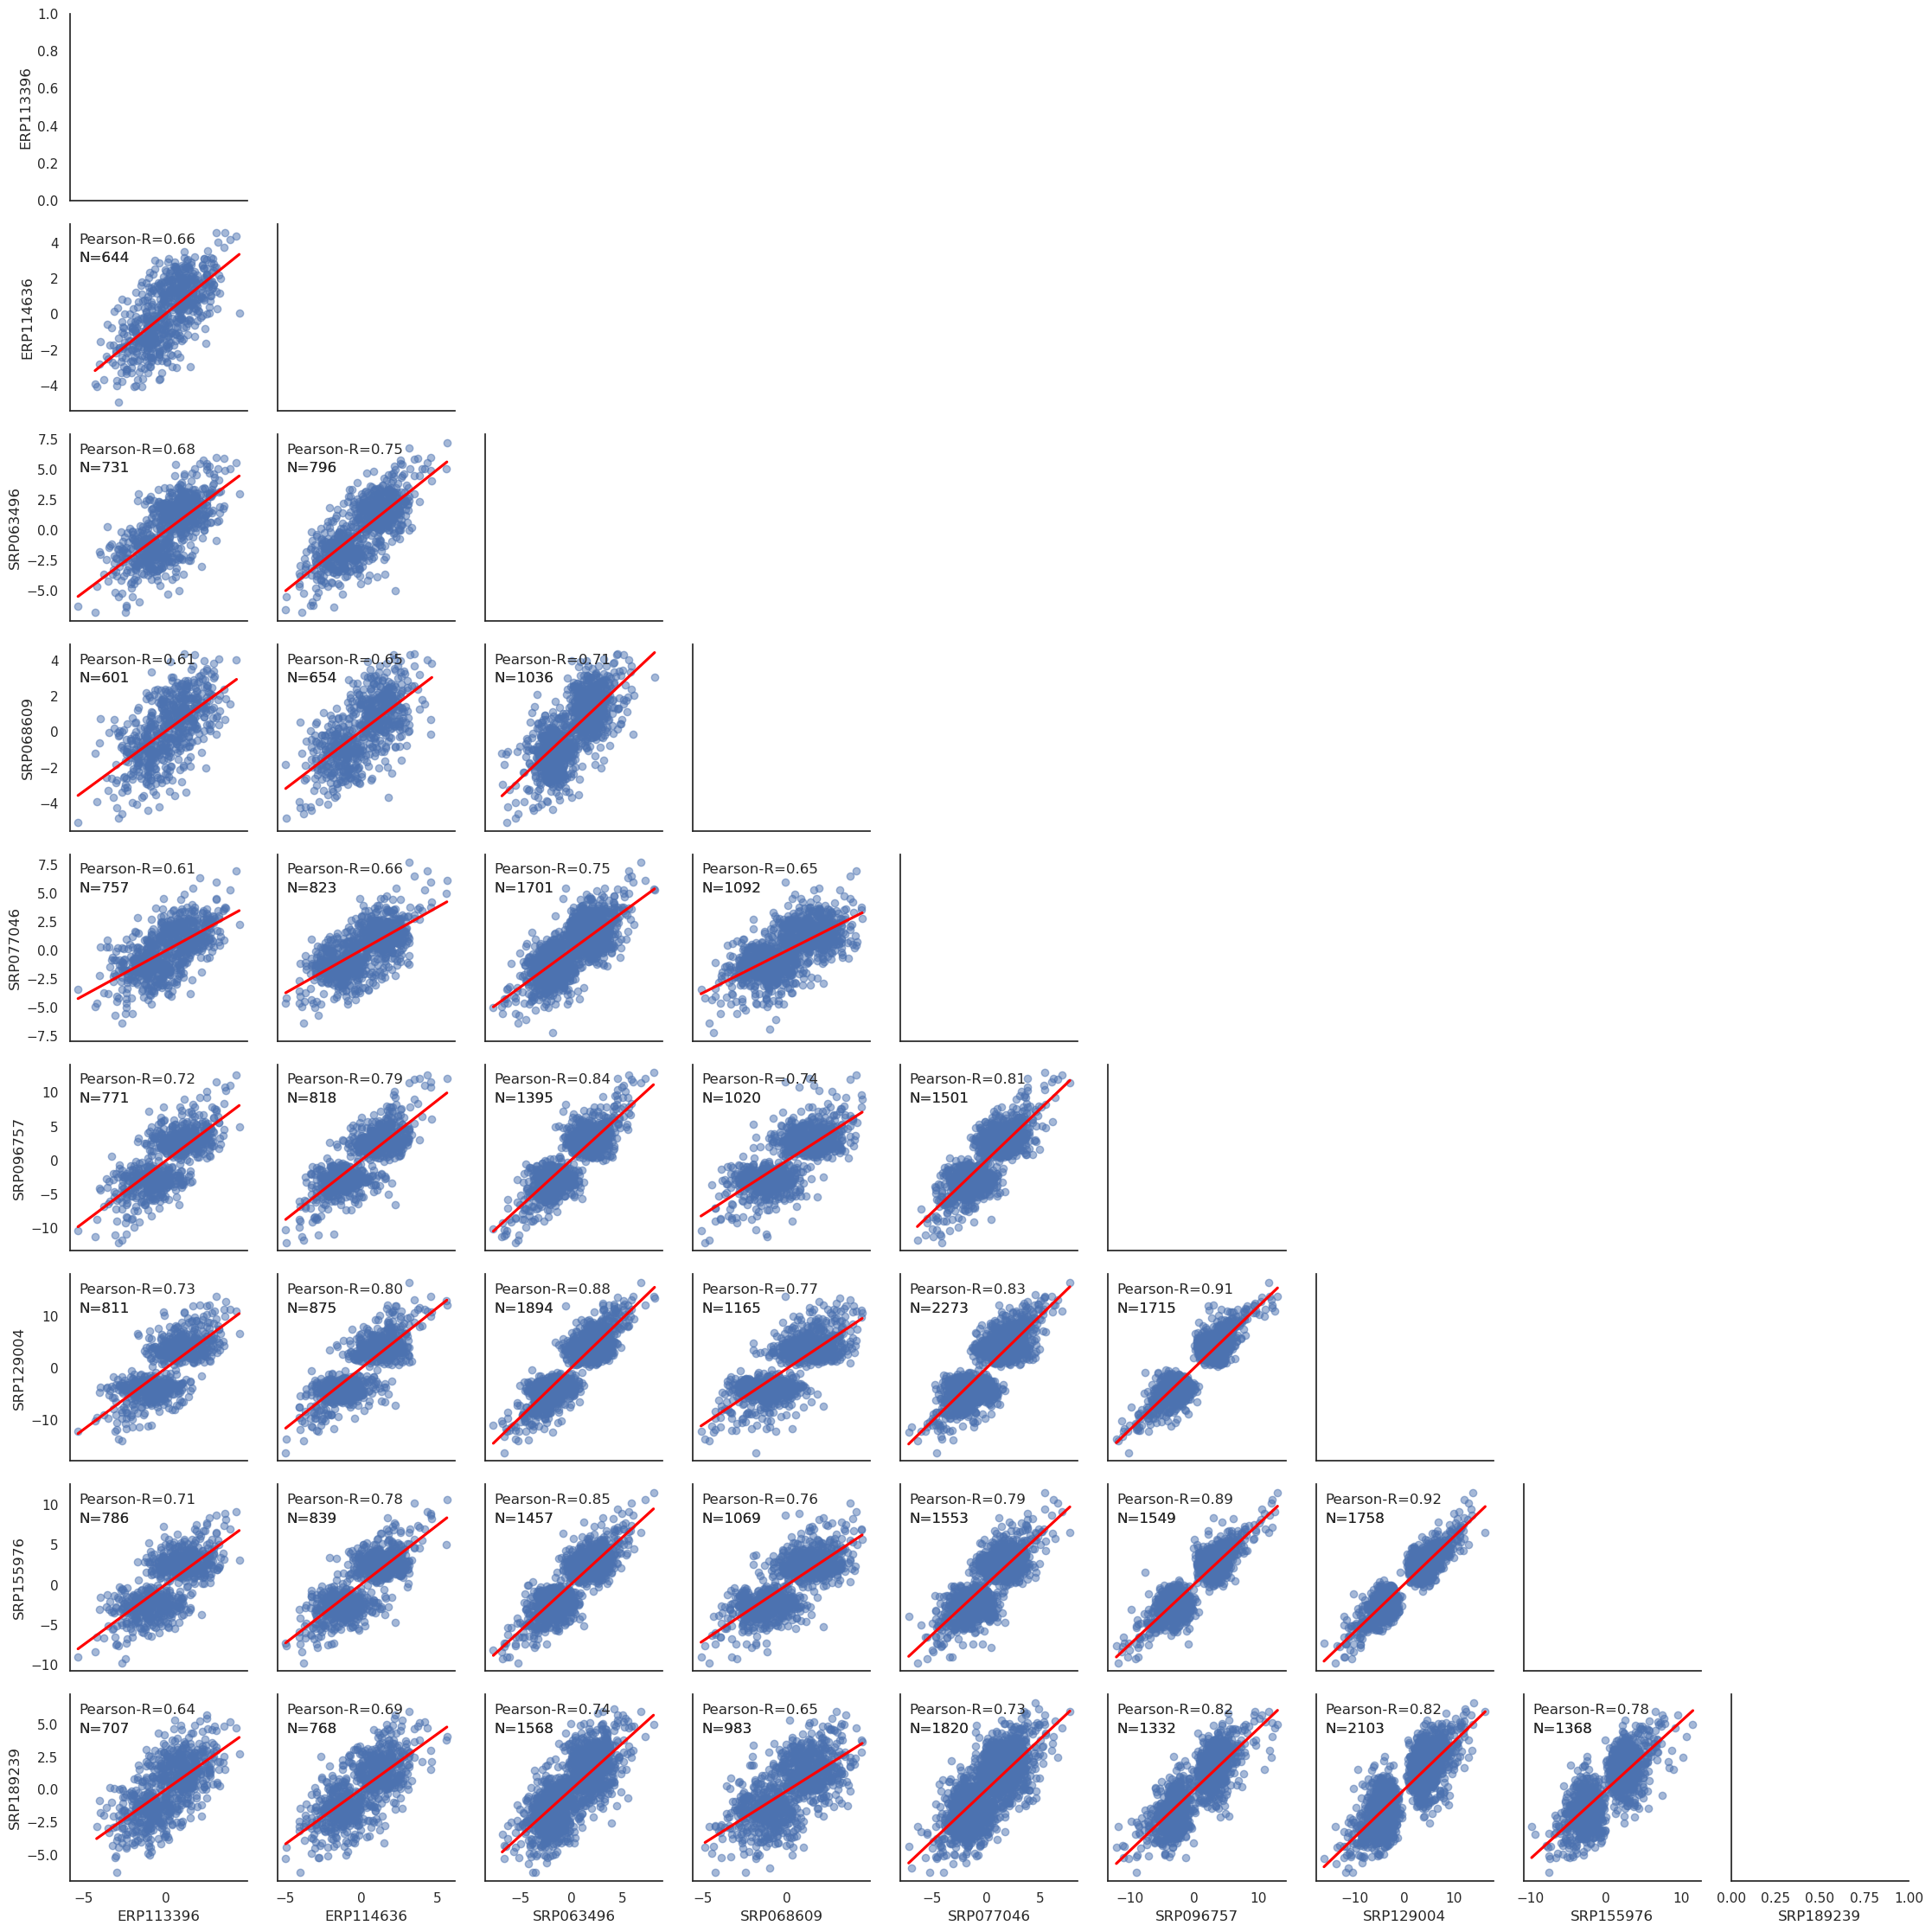

In [28]:
# Create a PairGrid for the scatter plots
g = sns.PairGrid(dataset_columns)

# Define the x_labels and y_labels
labels = ['ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']

# Function to plot scatter with trendline, N, and Pearson-R
def scatter_with_trendline(x, y, **kwargs):
    # Remove NaN values
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx]
    y_valid = y[valid_idx]
    
    if len(x_valid) > 1:  # Ensure enough valid points for Pearson-R calculation
        # Scatter plot with trendline
        sns.regplot(x=x_valid, y=y_valid, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, **kwargs)
        
        # Calculate number of data points (N)
        n = len(x_valid)
        
        # Calculate Pearson-R
        pearson_r, _ = pearsonr(x_valid, y_valid)
        
        # Display N and Pearson-R
        plt.text(0.05, 0.95, f'Pearson-R={pearson_r:.2f}', ha='left', va='top', transform=plt.gca().transAxes)
        plt.text(0.05, 0.85, f'N={n}', ha='left', va='top', transform=plt.gca().transAxes)
        plt.text(0.05, 0.85, f'N={n}', ha='left', va='top', transform=plt.gca().transAxes)


# Map the lower triangle with scatter plots including trendlines, leave the diagonal and upper triangle empty
g.map_lower(scatter_with_trendline)

# Remove upper triangle and diagonal plots by setting their axes to invisible
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Set custom x-axis and y-axis labels
for i, ax in enumerate(g.axes[-1, :]):  # Set the x-axis labels on the bottom
    ax.set_xlabel(labels[i], rotation=0, ha='center')

for i, ax in enumerate(g.axes[:, 0]):  # Set the y-axis labels on the left
    ax.set_ylabel(labels[i], rotation=90, ha='center')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()